In [6]:
import gc
gc.collect()

2144

In [7]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch

In [8]:
import psutil
import platform

# Get CPU information
def cpu_info():
    cpu_count = psutil.cpu_count(logical=True)
    cpu_freq = psutil.cpu_freq()
    print(f"CPU Core Count: {cpu_count}")
    print(f"CPU Frequency: {cpu_freq.current} MHz")

# Get GPU information
def gpu_info():
    try:
        from GPUtil import getGPUs
        gpus = getGPUs()
        if gpus:
            for gpu in gpus:
                print(f"GPU: {gpu.name}")
                print(f"Memory: {gpu.memoryTotal} MB")
                print(f"Used Memory: {gpu.memoryUsed} MB")
                print(f"Free Memory: {gpu.memoryFree} MB")
                print(f"Load: {gpu.load * 100}%")
        else:
            print("Unable to retrieve GPU information.")
    except ImportError:
        print("GPUtil library is not installed. Run 'pip install gputil' to install it.")

# Get system information
def system_info():
    print(f"Processor: {platform.processor()}")

if __name__ == "__main__":
    print("--System Information--")
    system_info()
    print("\n--CPU Information--")
    cpu_info()
    print("\n--GPU Information--")
    gpu_info()


--System Information--
Processor: Intel64 Family 6 Model 154 Stepping 3, GenuineIntel

--CPU Information--
CPU Core Count: 12
CPU Frequency: 2000.0 MHz

--GPU Information--
GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Memory: 4096.0 MB
Used Memory: 1246.0 MB
Free Memory: 2730.0 MB
Load: 0.0%


In [9]:
gc.collect()

16

Yolov8n.pt model

In [10]:
# cuda
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch

yolov8model = YOLO("yolov8n.pt")
img = cv2.imread("bus.jpg")
results = yolov8model.predict(source=img, device='cuda')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f'ID: {class_id} Conf: {confidence:.2f}', 
                    (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
used_device = next(yolov8model.model.parameters()).device
print("Model is running on:", used_device)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()





0: 640x480 4 persons, 1 bus, 1 stop sign, 41.5ms
Speed: 5.3ms preprocess, 41.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Model is running on: cuda:0


In [11]:
import gc
gc.collect()

5295


0: 640x480 4 persons, 1 bus, 1 stop sign, 190.1ms
Speed: 15.6ms preprocess, 190.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 480)
Model is running on: cpu


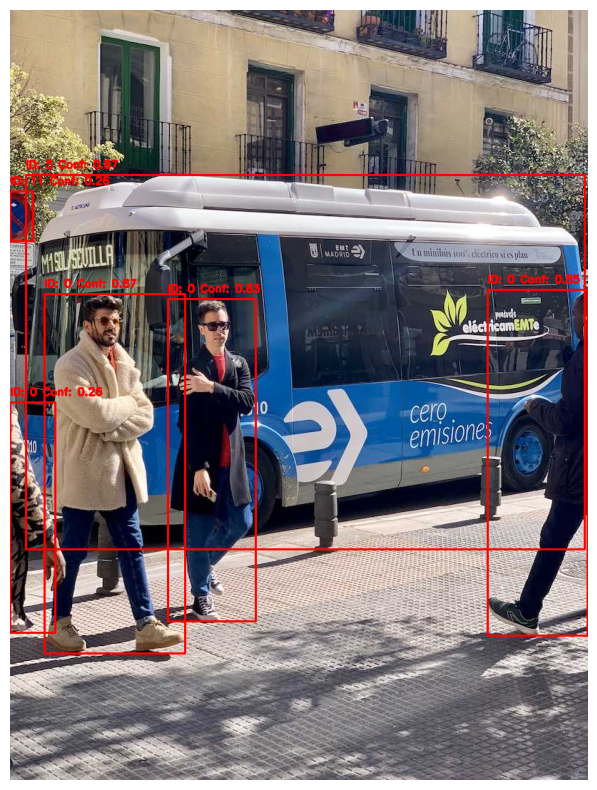

In [12]:
# cpu
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch

yolov8model = YOLO("yolov8n.pt")
img = cv2.imread("bus.jpg")
results = yolov8model.predict(source=img, device='cpu')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f'ID: {class_id} Conf: {confidence:.2f}', 
                    (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

used_device = next(yolov8model.model.parameters()).device
print("Model is running on:", used_device)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()




In [13]:
import gc
gc.collect()

5297

Pruned model usages


0: 640x480 7 persons, 1 bus, 42.8ms
Speed: 7.7ms preprocess, 42.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Model is running on: cuda:0


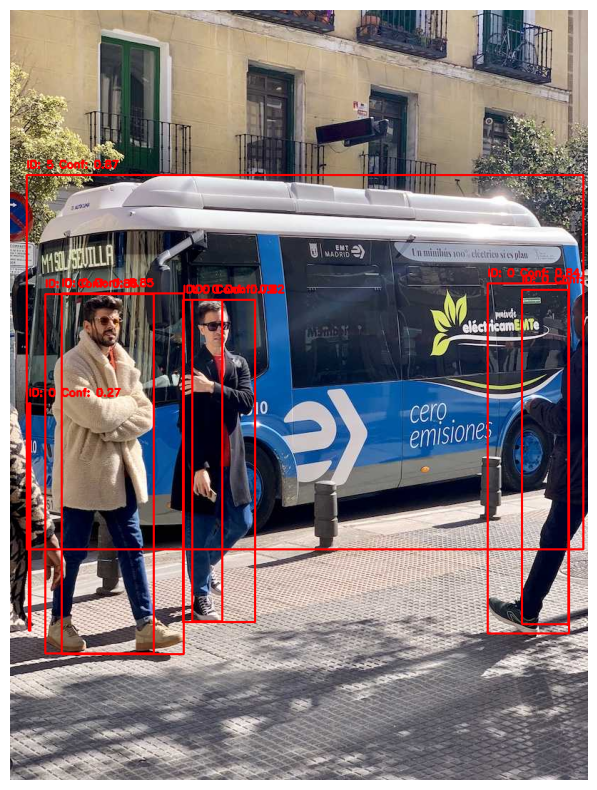

In [14]:
# cuda pruned


yolov8model = YOLO("yolov8n_trained_pruned.pt")
img = cv2.imread("bus.jpg")
results = yolov8model.predict(source=img, device='cuda')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f'ID: {class_id} Conf: {confidence:.2f}', 
                    (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
used_device = next(yolov8model.model.parameters()).device
print("Model is running on:", used_device)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()




In [15]:
import gc
gc.collect()

5295


0: 640x480 7 persons, 1 bus, 125.2ms
Speed: 8.0ms preprocess, 125.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Model is running on: cpu


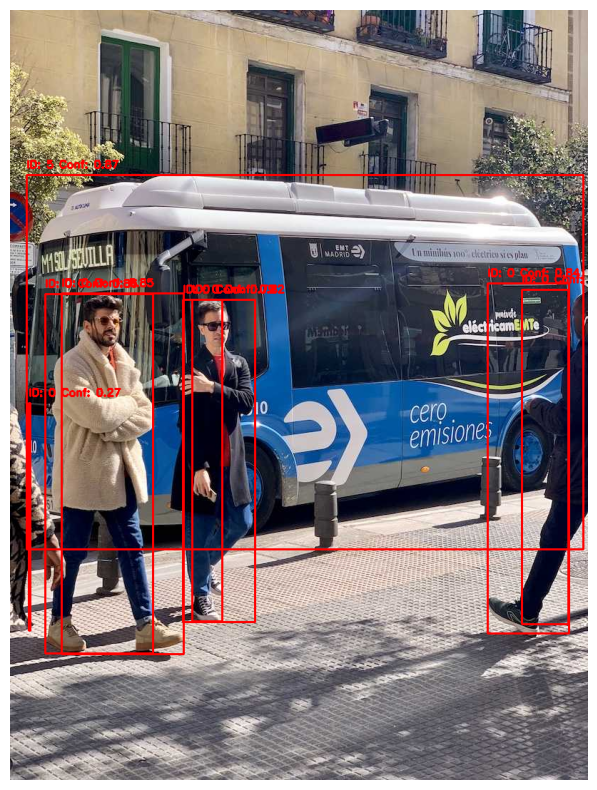

In [16]:
# cpu pruned
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch

yolov8model = YOLO("yolov8n_trained_pruned.pt")
img = cv2.imread("bus.jpg")
results = yolov8model.predict(source=img, device='cpu')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f'ID: {class_id} Conf: {confidence:.2f}', 
                    (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
used_device = next(yolov8model.model.parameters()).device
print("Model is running on:", used_device)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()




In [27]:
import gc
gc.collect()

4365

Openvino

Loading yolov8n_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

0: 640x640 4 persons, 1 bus, 67.6ms
Speed: 7.5ms preprocess, 67.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


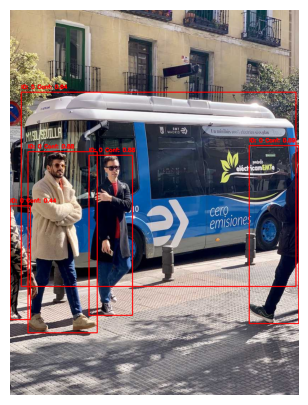

In [28]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


yolov8model = YOLO('yolov8n_openvino_model/', task="detect")  


img = cv2.imread("bus.jpg")


results = yolov8model.predict(source=img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f'ID: {class_id} Conf: {confidence:.2f}', 
                    (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.show()
